In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.shape

(9578, 14)

In [11]:
# Replace '.' with '_' in column names
df.columns = df.columns.str.replace('.', '_')


<ipython-input-11-85872d85a24e>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_')


In [12]:
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
df.credit_policy.unique()

array([1, 0])

In [13]:
df.credit_policy.value_counts()

1    7710
0    1868
Name: credit_policy, dtype: int64

In [14]:
df.isna().sum()

credit_policy        0
purpose              0
int_rate             0
installment          0
log_annual_inc       0
dti                  0
fico                 0
days_with_cr_line    0
revol_bal            0
revol_util           0
inq_last_6mths       0
delinq_2yrs          0
pub_rec              0
not_fully_paid       0
dtype: int64

In [15]:
# transform categorical value in purpose category to discrete numerical

df['purpose'] = df['purpose'].astype('category')
df['purpose'] = df['purpose'].cat.codes


In [17]:
df.purpose.unique()

array([2, 1, 0, 4, 6, 5, 3], dtype=int8)

In [18]:
df.purpose.value_counts()

2    3957
0    2331
1    1262
4     629
6     619
5     437
3     343
Name: purpose, dtype: int64

In [16]:
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [19]:
X = df.drop(['credit_policy'],axis=1)
y = df['credit_policy']

In [20]:
X.shape, y.shape

((9578, 13), (9578,))

In [21]:
from imblearn.over_sampling import SMOTE
x_bal, y_bal = SMOTE().fit_resample(X, y)

In [22]:
np.random.seed(12345)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train,y_test = train_test_split(x_bal,
                                                   y_bal,
                                                   stratify = y_bal,
                                                   test_size=0.2,
                                                   random_state=12345)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12336, 13), (3084, 13), (12336,), (3084,))

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
# X-scaled = (X - mean)/sd -> z value

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

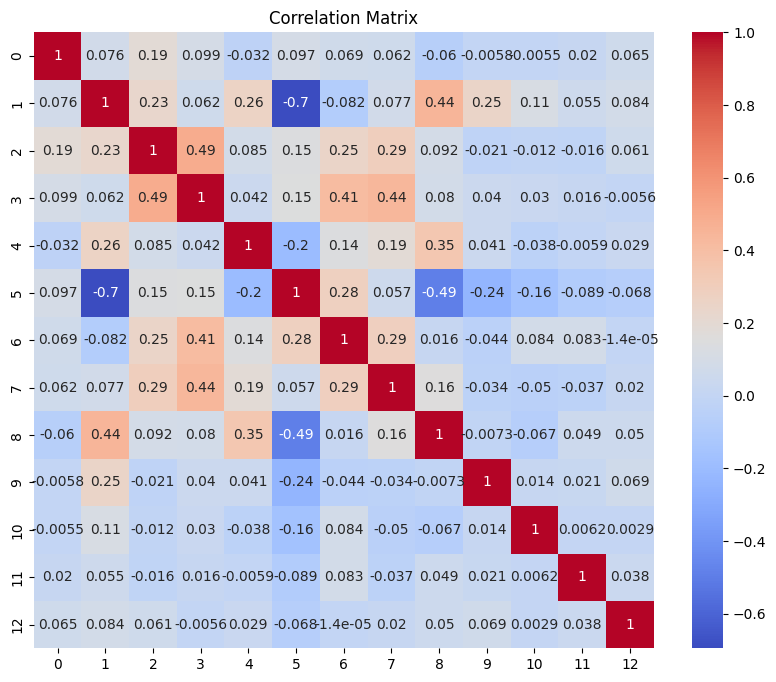

In [45]:
# which categories are highly correlated

import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation matrix
X_train_df = pd.DataFrame(X_train_scaled)
corr_matrix = X_train_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [28]:
import tensorflow as tf

In [29]:
print(tf.__version__)

2.15.0


In [30]:
from tensorflow.keras.models import Sequential

In [31]:
from tensorflow.keras.layers import Dense, Input

In [32]:
model = Sequential()

In [33]:
X_train_scaled.shape[1]

13

In [34]:
model.add(Input(shape = (X_train_scaled.shape[1],))) # Input Layer

In [35]:
# First Hidden Layer - 128 neurons, Relu activation
model.add(Dense(units=128,
                activation='relu'
         ))

In [36]:
# Second Hidden Layer - 64 neurons, Relu activation
model.add(Dense(units=64, activation='relu'))

In [37]:
# Third Hidden Layer 32, relu activation
model.add(Dense(units=32, activation='relu'))

In [38]:
# Output layer - Sigmoid
model.add(Dense(units=1, activation='sigmoid'))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12161 (47.50 KB)
Trainable params: 12161 (47.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.compile(optimizer='adam', # Variant of Gradient Descent
              loss= 'binary_crossentropy', # Log Loss or Binary Cross Entropy
              metrics=['accuracy']) # Monitor Accuracy

In [43]:
result = model.fit(X_train_scaled,
                   y_train,
                   validation_data = (X_test_scaled, y_test),
                   epochs=15)

Epoch 1/15
386/386 [==============================] - 1s 2ms/step - loss: 0.0541 - accuracy: 0.9784 - val_loss: 0.1869 - val_accuracy: 0.9446
Epoch 2/15
386/386 [==============================] - 1s 2ms/step - loss: 0.0506 - accuracy: 0.9818 - val_loss: 0.1782 - val_accuracy: 0.9449
Epoch 3/15
386/386 [==============================] - 1s 2ms/step - loss: 0.0526 - accuracy: 0.9797 - val_loss: 0.2018 - val_accuracy: 0.9407
Epoch 4/15
386/386 [==============================] - 2s 4ms/step - loss: 0.0515 - accuracy: 0.9798 - val_loss: 0.2165 - val_accuracy: 0.9387
Epoch 5/15
386/386 [==============================] - 1s 3ms/step - loss: 0.0511 - accuracy: 0.9806 - val_loss: 0.2342 - val_accuracy: 0.9355
Epoch 6/15
386/386 [==============================] - 1s 2ms/step - loss: 0.0521 - accuracy: 0.9806 - val_loss: 0.2036 - val_accuracy: 0.9397
Epoch 7/15
386/386 [==============================] - 1s 3ms/step - loss: 0.0487 - accuracy: 0.9810 - val_loss: 0.2413 - val_accuracy: 0.9283
Epoch 